In [78]:
#Importing libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import warnings
warnings.filterwarnings('ignore')

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [80]:
# importing the dataset

dataset = pd.read_csv("Big_mart.csv")
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Perform data cleaning on the dataset

In [81]:
# Check  missing values

dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

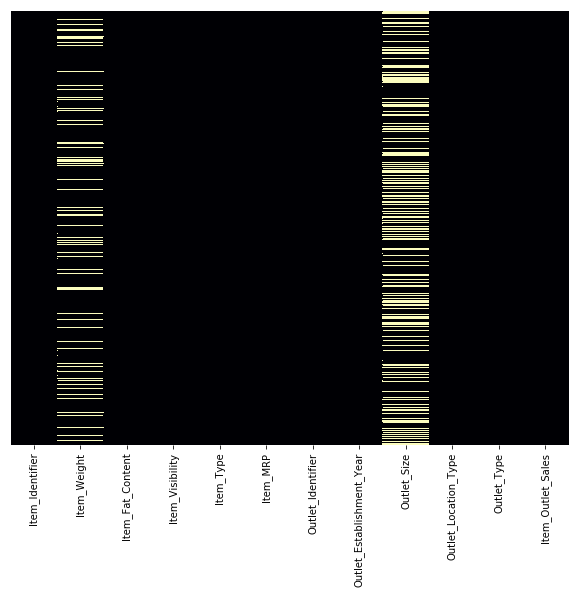

In [83]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='magma',yticklabels=False)
plt.show()

# Preprocessing

In [84]:
dataset.describe(include ='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [85]:
avg_weight = dataset.pivot_table(index ='Item_Identifier',values = 'Item_Weight')
avg_weight.describe()

,Item_Weight
count,1555.000000
mean,12.808553
std,4.652088
min,4.555000
25%,8.710000
50%,12.600000
75%,16.750000
max,21.350000


In [86]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    if pd.isnull(Weight):
        return avg_weight['Item_Weight'][avg_weight.index == Identifier]
    else:
        return Weight

dataset['Item_Weight'] = dataset[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)

dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [87]:
dataset.loc[927,:].Item_weight = 12.782404
dataset.loc[1922,:].Item_Weight = 13.031230
dataset.loc[4187,:].Item_Weight = 13.379905
dataset.loc[5022,:].Item_Weight = 12.285317
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [88]:
# These Item Identifiers have only one occurence
dataset[dataset.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [89]:
avg_size = dataset.pivot_table(values = 'Outlet_Size',columns='Outlet_Type',aggfunc=lambda x:x.mode())
avg_size.T

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [90]:
def impute_size(x):
    size = x[0]
    index = x[1]
    new_size =''
    if pd.isnull(size):
        new_size = avg_size.loc['Outlet_Size'][avg_size.columns == index][0]
    else:
        new_size = size
    return new_size

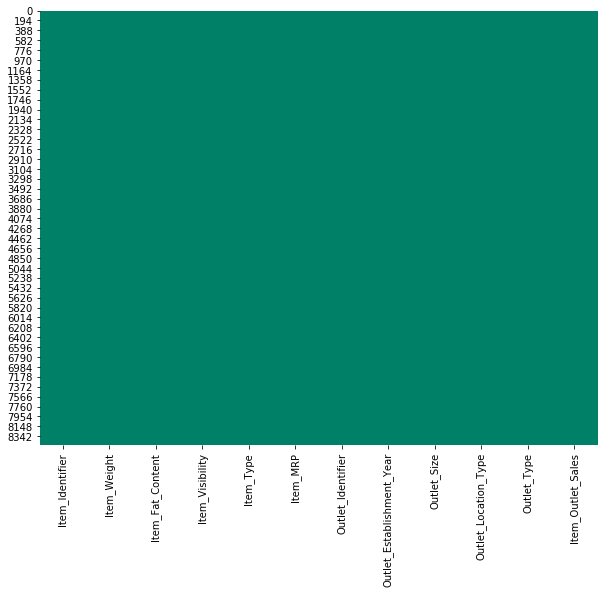

In [91]:
dataset['Outlet_Size'] = dataset[['Outlet_Size','Outlet_Type']].apply(impute_size,axis =1)
sns.heatmap(dataset.isnull(),cbar=False,cmap = 'summer')

In [92]:
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [93]:
dataset = dataset.dropna(axis=0,how='any')
dataset.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [94]:
avg_visiblity = dataset.pivot_table(index ='Item_Identifier',values='Item_Visibility')
avg_visiblity.describe()

,Item_Visibility
count,1555.000000
mean,0.065574
std,0.044456
min,0.003981
25%,0.030381
50%,0.054067
75%,0.092935
max,0.223469


In [95]:
def impute_visiblity(x):
    identity = x[0]
    vis = x[1]
    new_vis = 0.0
    if vis == 0:
        new_vis = avg_visiblity['Item_Visibility'][avg_visiblity.index == identity]
    else:
        new_vis = vis
    return new_vis

dataset['Item_Visibility'] = dataset[['Item_Identifier','Item_Visibility']].apply(impute_visiblity,axis=1).astype('float')
dataset.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8519,8519.000000,8519,8519.000000,8519,8519.000000,8519,8519.000000,8519,8519,8519,8519.000000
unique,1555,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Small,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5088,NaN,1232,NaN,932,NaN,4797,3347,5577,NaN
mean,NaN,12.875420,NaN,0.069652,NaN,141.010019,NaN,1997.837892,NaN,NaN,NaN,2181.188779
std,NaN,4.646098,NaN,0.049798,NaN,62.283594,NaN,8.369105,NaN,NaN,NaN,1706.511093
min,NaN,4.555000,NaN,0.003575,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.785000,NaN,0.031114,NaN,93.844900,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.650000,NaN,0.056919,NaN,143.047000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.097132,NaN,185.676600,NaN,2004.000000,NaN,NaN,NaN,3100.630600


# Exploratory Data Analysis

In [97]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.060928,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


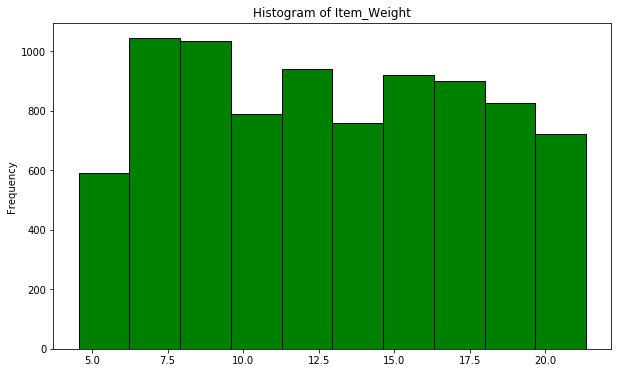

In [99]:
dataset.Item_Weight.plot(kind='hist', color='green', edgecolor='black', figsize=(10,6), title='Histogram of Item_Weight')


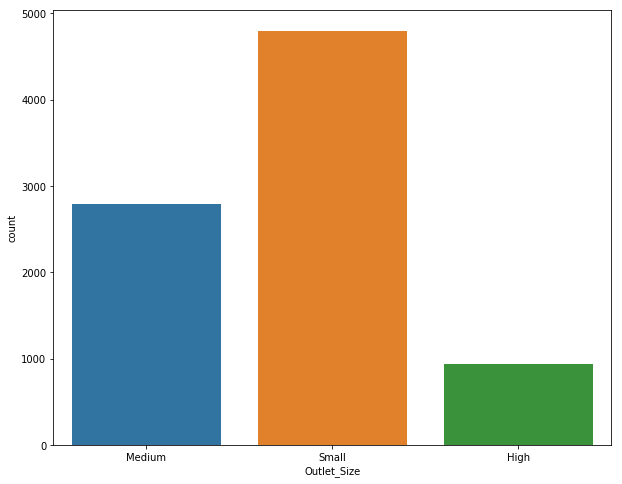

In [100]:
sns.countplot(dataset['Outlet_Size'])

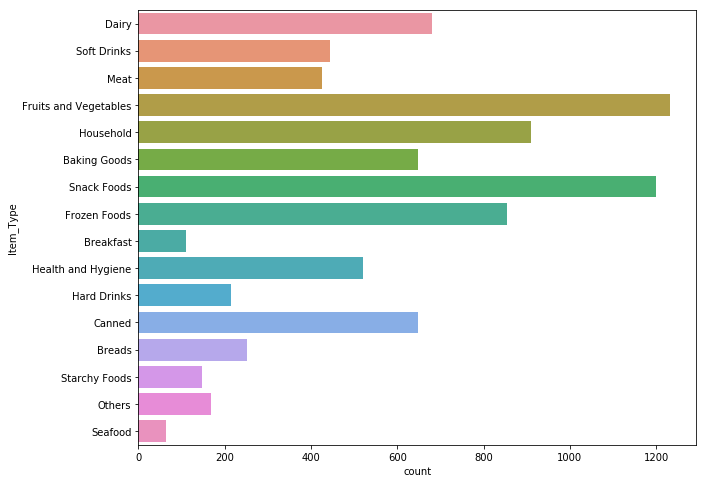

In [101]:
sns.countplot(y=dataset['Item_Type'])

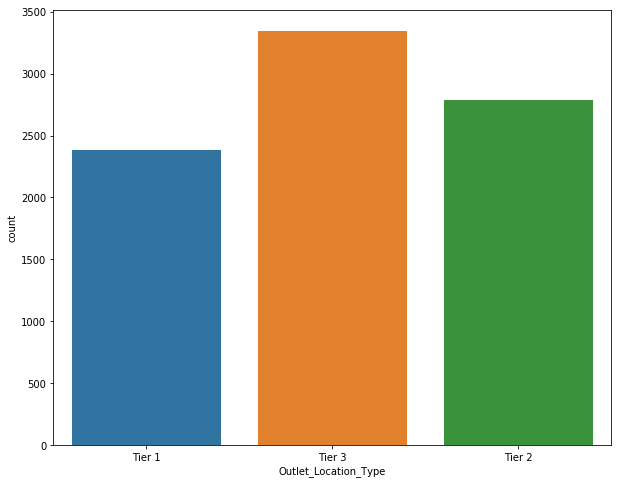

In [102]:
sns.countplot(dataset['Outlet_Location_Type'])

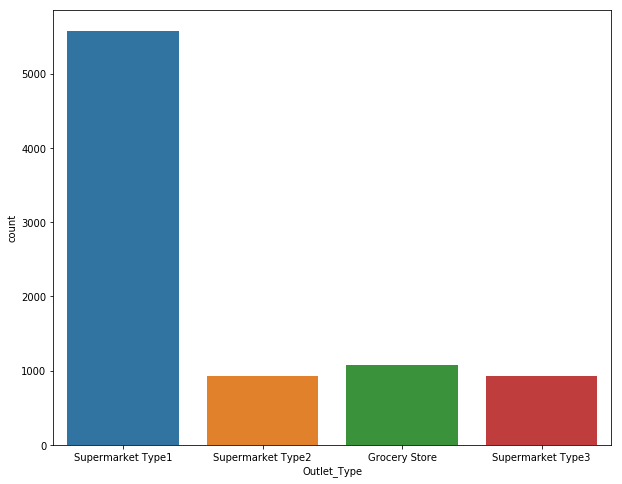

In [103]:
sns.countplot(dataset['Outlet_Type'])

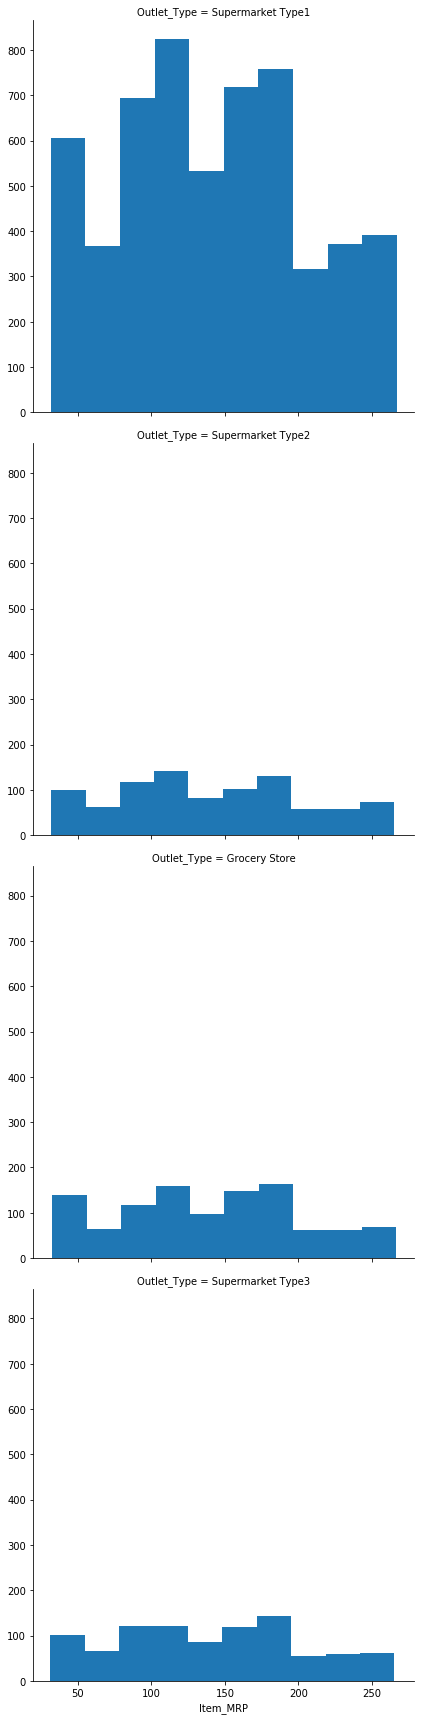

In [104]:
sns.FacetGrid(data = dataset,row = 'Outlet_Type',size = 6).map(plt.hist,'Item_MRP')

In [105]:
#### We will split data into two 
#### 1. numerical data
#### 2 . categorical data
#### For better visualization



In [106]:
num = dataset.select_dtypes(exclude ='object')
cat = dataset.select_dtypes(include ='object')
print("Shape of num is {} and of cat is {}".format(num.shape,cat.shape))
# There are 5 Numerical and 7 Categorical Columns

Shape of num is (8519, 5) and of cat is (8519, 7)


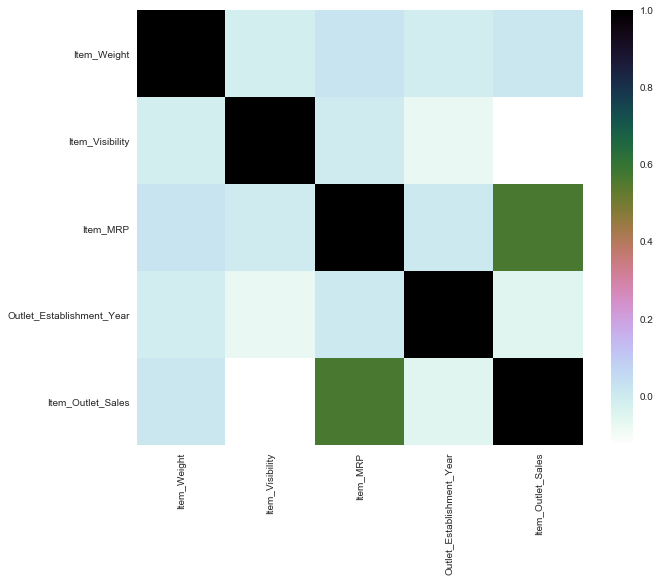

In [107]:
# Plotting heat map for analyzing correlation with sales price
corr = num.corr()
sns.set(style='whitegrid',color_codes=True)
plt.xticks(rotation=90)
sns.heatmap(corr,cmap = plt.cm.cubehelix_r)

In [108]:
print(corr.Item_Outlet_Sales.sort_values(ascending = False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567803
Item_Weight                  0.013168
Outlet_Establishment_Year   -0.049083
Item_Visibility             -0.128103
Name: Item_Outlet_Sales, dtype: float64


# Visualization

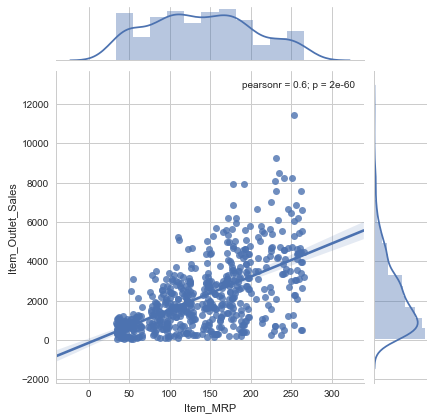

In [109]:
# Lets visualize it with saleprice 
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',size=6 ,data = dataset.sample(600),kind = 'reg')

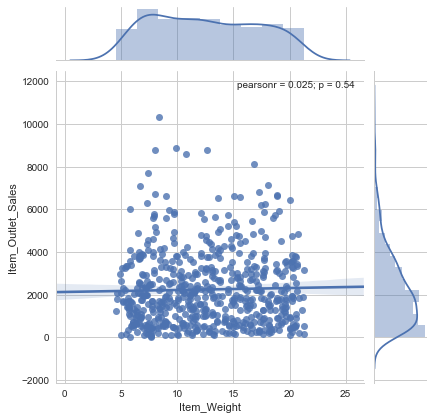

In [110]:
sns.jointplot(x='Item_Weight',y='Item_Outlet_Sales',size=6,kind='reg',data = dataset.sample(600))

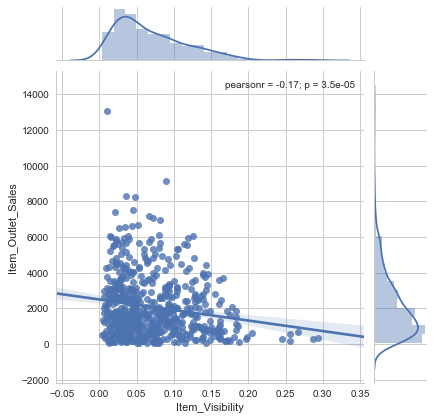

In [111]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',size=6,kind='reg',data = dataset.sample(600))

# visualize categorical values

In [112]:
# We will use ANOVA for categorical correrlation with sale
from scipy import stats
cate = [f for f in dataset.columns if dataset.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cate
    pvals = []
    for c in cate:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['Item_Outlet_Sales'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

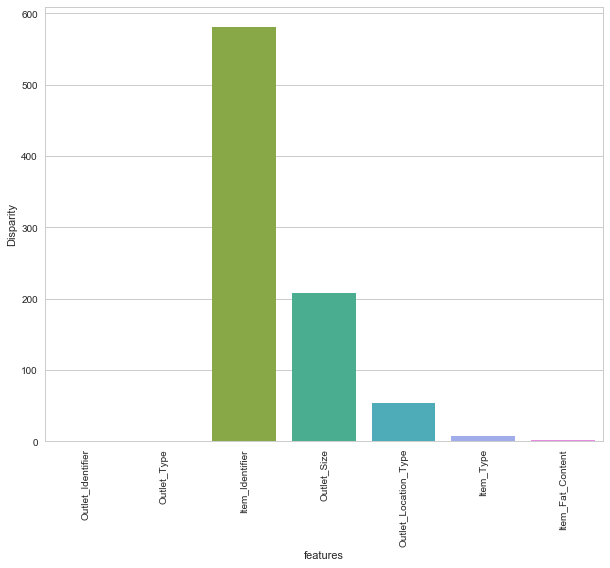

In [113]:
cat['Item_Outlet_Sales'] = num.Item_Outlet_Sales.values
k = anova(cat)
k['Disparity'] = np.log(1./k['pval'].values)
sns.barplot(data = k,x='features',y='Disparity')
plt.xticks(rotation = 90)

In [114]:
int_features =['Item_MRP','Item_Weight','Item_Identifier','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Item_Type','Item_Outlet_Sales','Item_Fat_Content','Item_Visibility']
s_dataset = dataset[int_features]
s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.015274
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,Low Fat,0.008082


In [115]:
s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.015274
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,Low Fat,0.008082


# Feature Engineering

In [116]:
s_dataset['Item_Type_Combined'] = s_dataset['Item_Identifier'].map(lambda x : x[0:2])
s_dataset.Item_Type_Combined = s_dataset.Item_Type_Combined.map({"FD":"FOOD","DR":"DRINK","NC":"NON_CONSUMABLE"}) 
# s_df = s_df.drop(labels = ['Item_Identifier'],axis = 1)
s_dataset.head()


,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Type_Combined
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047,FOOD
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278,DRINK
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760,FOOD
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.015274,FOOD
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,Low Fat,0.008082,NON_CONSUMABLE


In [117]:
# 0 = True 1 =False
s_dataset['Item_Costly'] = s_dataset.Item_MRP.apply(lambda x : 0 if x >=150 else 1)
s_dataset['Item_Heavy'] = s_dataset.Item_Weight.apply(lambda x : 0 if x> 12 else 1)
s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Type_Combined,Item_Costly,Item_Heavy
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047,FOOD,0,1
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278,DRINK,1,1
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760,FOOD,1,0
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.015274,FOOD,0,0
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,Low Fat,0.008082,NON_CONSUMABLE,1,1


In [118]:
s_dataset.Item_Type_Combined.value_counts()

FOOD              6121
NON_CONSUMABLE    1599
DRINK              799
Name: Item_Type_Combined, dtype: int64

In [119]:
# Marking non consumable in fat content
idx = s_dataset.Item_Type_Combined == "NON_CONSUMABLE"
s_dataset.loc[idx,'Item_Fat_Content'] = 'NON_CONSUMABLE'
s_dataset.Item_Fat_Content = s_dataset.Item_Fat_Content.replace({"LF":'Low Fat',"reg":"Regular","low fat":"Low Fat"})
s_dataset.Item_Fat_Content.value_counts()

Low Fat           3917
Regular           3003
NON_CONSUMABLE    1599
Name: Item_Fat_Content, dtype: int64

In [120]:
s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Type_Combined,Item_Costly,Item_Heavy
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047,FOOD,0,1
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278,DRINK,1,1
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760,FOOD,1,0
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.015274,FOOD,0,0
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,NON_CONSUMABLE,0.008082,NON_CONSUMABLE,1,1


In [121]:
s_dataset['Is_Item_Solid'] = (s_dataset.Item_Type_Combined == 'FOOD' )*1
s_dataset['Visibilty_2_MRP_Ratio'] = s_dataset.Item_Visibility/s_dataset.Item_MRP
s_dataset['Visibilty_2_Weight_Ratio'] = s_dataset.Item_Visibility/s_dataset.Item_Weight

s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Type_Combined,Item_Costly,Item_Heavy,Is_Item_Solid,Visibilty_2_MRP_Ratio,Visibilty_2_Weight_Ratio
0,249.8092,9.30,FDA15,OUT049,Tier 1,Medium,Dairy,3735.1380,Low Fat,0.016047,FOOD,0,1,1,0.000064,0.001726
1,48.2692,5.92,DRC01,OUT018,Tier 3,Medium,Soft Drinks,443.4228,Regular,0.019278,DRINK,1,1,0,0.000399,0.003256
2,141.6180,17.50,FDN15,OUT049,Tier 1,Medium,Meat,2097.2700,Low Fat,0.016760,FOOD,1,0,1,0.000118,0.000958
3,182.0950,19.20,FDX07,OUT010,Tier 3,Small,Fruits and Vegetables,732.3800,Regular,0.015274,FOOD,0,0,1,0.000084,0.000796
4,53.8614,8.93,NCD19,OUT013,Tier 3,High,Household,994.7052,NON_CONSUMABLE,0.008082,NON_CONSUMABLE,1,1,0,0.000150,0.000905


In [122]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
var = ['Outlet_Location_Type','Item_Identifier','Outlet_Identifier','Outlet_Size','Item_Type','Item_Type_Combined','Item_Fat_Content']
le = LabelEncoder()
for _ in var:
    s_dataset[_] = le.fit_transform(s_dataset[_])
s_dataset.head()

,Item_MRP,Item_Weight,Item_Identifier,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Item_Type,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Type_Combined,Item_Costly,Item_Heavy,Is_Item_Solid,Visibilty_2_MRP_Ratio,Visibilty_2_Weight_Ratio
0,249.8092,9.30,156,9,0,1,4,3735.1380,0,0.016047,1,0,1,1,0.000064,0.001726
1,48.2692,5.92,8,3,2,1,14,443.4228,2,0.019278,0,1,1,0,0.000399,0.003256
2,141.6180,17.50,660,9,0,1,10,2097.2700,0,0.016760,1,1,0,1,0.000118,0.000958
3,182.0950,19.20,1117,0,2,2,6,732.3800,2,0.015274,1,0,0,1,0.000084,0.000796
4,53.8614,8.93,1293,1,2,0,9,994.7052,1,0.008082,2,1,1,0,0.000150,0.000905


In [123]:
# One Hot Encoding
s_dataset = pd.get_dummies(s_dataset,columns=['Outlet_Location_Type','Is_Item_Solid','Item_Identifier','Outlet_Identifier','Outlet_Size','Item_Type','Item_Fat_Content','Item_Type_Combined','Item_Costly','Item_Heavy'])
s_dataset.head()


,Item_MRP,Item_Weight,Item_Outlet_Sales,Item_Visibility,Visibilty_2_MRP_Ratio,Visibilty_2_Weight_Ratio,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Is_Item_Solid_0,...,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Item_Costly_0,Item_Costly_1,Item_Heavy_0,Item_Heavy_1
0,249.8092,9.30,3735.1380,0.016047,0.000064,0.001726,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
1,48.2692,5.92,443.4228,0.019278,0.000399,0.003256,0,0,1,1,...,0,0,1,1,0,0,0,1,0,1
2,141.6180,17.50,2097.2700,0.016760,0.000118,0.000958,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
3,182.0950,19.20,732.3800,0.015274,0.000084,0.000796,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
4,53.8614,8.93,994.7052,0.008082,0.000150,0.000905,0,0,1,1,...,0,1,0,0,0,1,0,1,0,1


In [124]:
s_dataset.isnull().sum()

Item_MRP                    0
Item_Weight                 0
Item_Outlet_Sales           0
Item_Visibility             0
Visibilty_2_MRP_Ratio       0
Visibilty_2_Weight_Ratio    0
Outlet_Location_Type_0      0
Outlet_Location_Type_1      0
Outlet_Location_Type_2      0
Is_Item_Solid_0             0
Is_Item_Solid_1             0
Item_Identifier_0           0
Item_Identifier_1           0
Item_Identifier_2           0
Item_Identifier_3           0
Item_Identifier_4           0
Item_Identifier_5           0
Item_Identifier_6           0
Item_Identifier_7           0
Item_Identifier_8           0
Item_Identifier_9           0
Item_Identifier_10          0
Item_Identifier_11          0
Item_Identifier_12          0
Item_Identifier_13          0
Item_Identifier_14          0
Item_Identifier_15          0
Item_Identifier_16          0
Item_Identifier_17          0
Item_Identifier_18          0
                           ..
Outlet_Identifier_9         0
Outlet_Size_0               0
Outlet_Siz

# Model, predict and solve the problem

In [125]:
x = s_dataset.iloc[:,0:]
y = s_dataset.iloc[:,2]
x = x.drop(labels = ['Item_Outlet_Sales'],axis =1)
x.head()

,Item_MRP,Item_Weight,Item_Visibility,Visibilty_2_MRP_Ratio,Visibilty_2_Weight_Ratio,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Is_Item_Solid_0,Is_Item_Solid_1,...,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Item_Costly_0,Item_Costly_1,Item_Heavy_0,Item_Heavy_1
0,249.8092,9.30,0.016047,0.000064,0.001726,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,48.2692,5.92,0.019278,0.000399,0.003256,0,0,1,1,0,...,0,0,1,1,0,0,0,1,0,1
2,141.6180,17.50,0.016760,0.000118,0.000958,1,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
3,182.0950,19.20,0.015274,0.000084,0.000796,0,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
4,53.8614,8.93,0.008082,0.000150,0.000905,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,1


In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [127]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
round(reg.score(x_train,y_train) * 100,2)

68.83

In [128]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)

tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [129]:
tree_accuracy = round(tree.score(x_train,y_train),2)
tree_accuracy

0.61

In [130]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)

rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [131]:
rf_accuracy = round(rf.score(x_train,y_train),2)
rf_accuracy

0.59

In [132]:
models = pd.DataFrame({
    'Model': [ 'Decision Tree',
              'Random Forest'],
    'Score': [tree_accuracy, rf_accuracy]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,0.61
1,Random Forest,0.59
